In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

In [2]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

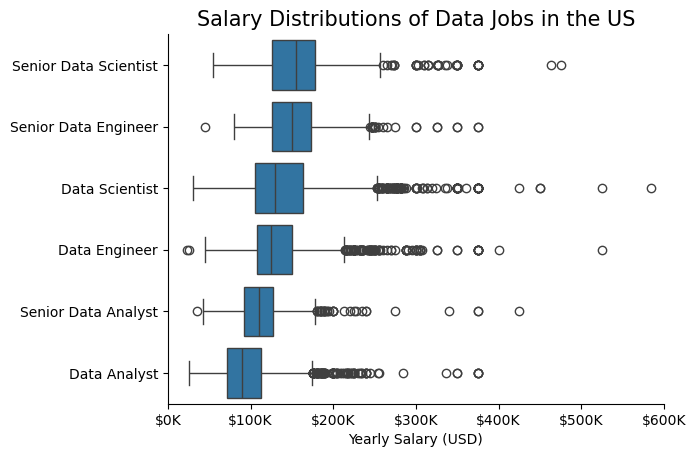

In [34]:
# SECTION 1

df_US = df[df['job_country'] == 'United States'].copy()
df_US.dropna(subset='salary_year_avg', inplace=True)

top6_list = df_US['job_title_short'].value_counts().index[:6].to_list()
df_data_roles = df_US[df_US['job_title_short'].isin(top6_list)]

median_salary = df_data_roles.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False)

sns.boxplot(data=df_data_roles, x='salary_year_avg', y='job_title_short', order=median_salary.index)
sns.despine()
plt.xlim(0,600000)
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.title('Salary Distributions of Data Jobs in the US', fontsize=15)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()

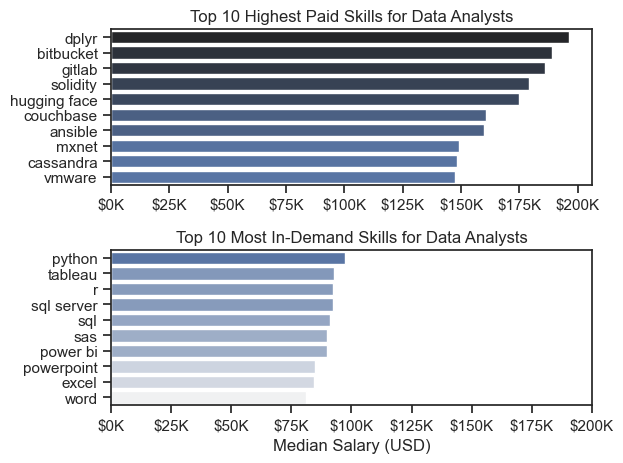

In [67]:
# SECTION 2

df_US_DA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_US_DA.dropna(subset='salary_year_avg', inplace=True)

df_US_DA_explode = df_US_DA.explode('job_skills')

salary_group = df_US_DA_explode.groupby('job_skills')['salary_year_avg'].agg(['median', 'count'])

high_salary = salary_group.sort_values(by='median', ascending=False).head(10)
top_skills_salary = salary_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

sns.set_theme(style='ticks')

fig, ax = plt.subplots(2, 1)

sns.barplot(data=high_salary, x='median', y=high_salary.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')

sns.barplot(data=top_skills_salary, x='median', y=top_skills_salary.index, ax=ax[1], hue='median', palette='light:b', legend=False)
ax[1].set_xlim(0, 200000)
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')

for i in range(2):
    ax[i].set_ylabel('')
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()